In [1]:
import imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA,IncrementalPCA

In [2]:
data=pd.read_csv('mnist_train.csv')
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = data.copy()
df = df.drop('label',axis=1)
df

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


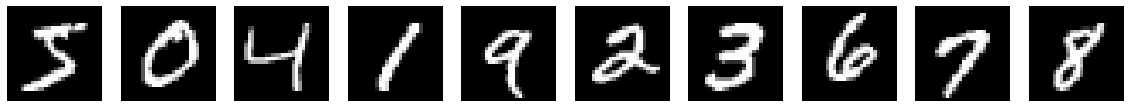

In [4]:
index_distinct_labels=data["label"].drop_duplicates().index
j=1
fig=plt.figure(1,figsize=(20,20))
for i in index_distinct_labels:
  plt.subplot(1,10,j)
  j=j+1
  plt.imshow(df.loc[i].array.reshape([28,28]), cmap='gray')
  plt.axis("off")

In [5]:
def draw_image_pca(n_components,data):
  n=len(n_components)
  j=1
  for component in n_components:
    pca_image=PCA(n_components=component)
    pca_image_full=pca_image.fit(data)
    pca_data_reduced=pca_image_full.transform(data)
    pca_data_recovered=pca_image_full.inverse_transform(pca_data_reduced)

    # col_count=0
    fig=plt.figure(figsize=(20,20))
    for i in index_distinct_labels:
      plt.subplot(n,10,j)
      plt.imshow(pca_data_recovered[i].reshape([28,28]),cmap='gray')
      # col_count+=n
      j+=1
      plt.axis("off")

In [6]:
#Đầu vào: tỉ lệ giải thích cho tổng thể, mảng các phương sai(Giá trị riêng)
#Đầu ra: Số thành phần chính cần chọn
def chose_factor(rate,arr_lambda):
  cs=np.cumsum(arr_lambda)
  cs=cs/cs[-1]
  for i in range(len(cs)):
    if cs[i]>=rate:
      break
  plt.plot([y for y in range(1,len(arr_lambda)+1)],cs,"-o")
  plt.ylabel("Tỷ lệ giải thích")
  plt.xlabel("Số thành thành phần chính")
  return i+1

154

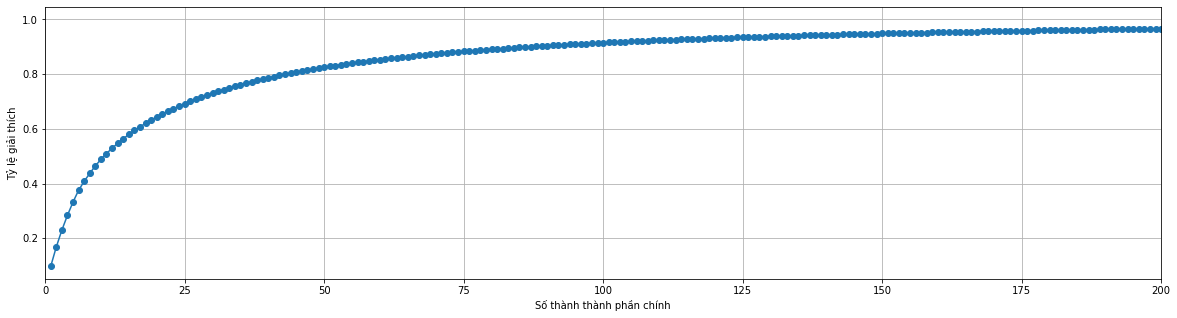

In [7]:
A=np.linalg.eig(df.cov())
B=A[0]
plt.figure(figsize=(20,5))
plt.xlim(0,200)
plt.grid("on")
chose_factor(0.95,B)

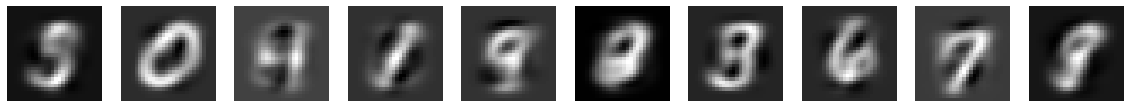

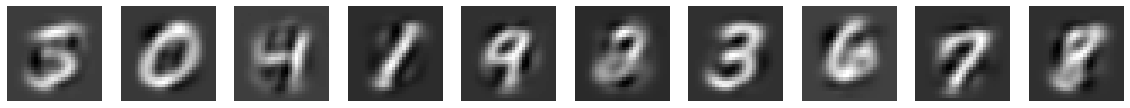

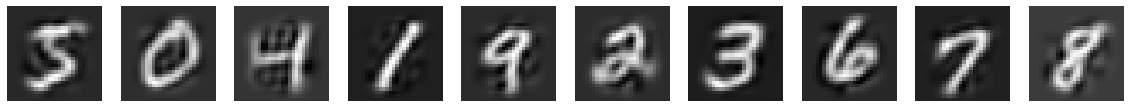

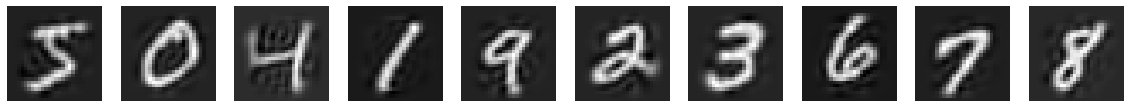

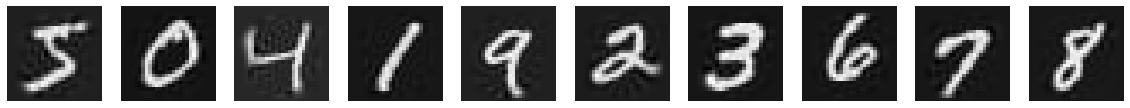

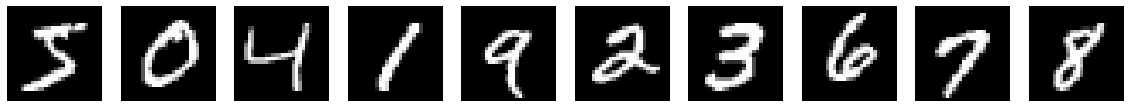

In [8]:
draw_image_pca([10,20,50,100,200,784],df)
plt.savefig("imageInverse",bbox_inches='tight')
# f, ax = plt.subplots(nrows = 7, ncols = 2, figsize=(16,16))
# ax